# Model Training — Student Engagement Prediction

In this notebook, we train a classification model to predict student engagement levels (0 = Low, 1 = High).  
We'll use a **Logistic Regression** model and evaluate its performance using accuracy, precision, recall, and F1-score.


In [24]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load data
data = pd.read_csv("../data/raw/student_engagement.csv")
data.head()


,student_name,avg_class_length,class_start_time,teacher_feedback_score,num_assignments_due,previous_engagement,previous_absences,engagement_level
0,Fikir,102,evening,2,0,0.674577,8,0
1,Mulu,135,afternoon,5,3,0.913842,4,0
2,Rahel,60,afternoon,5,4,0.348264,0,0
3,Saron,116,morning,4,3,0.263175,4,0
4,Abdi,123,morning,1,1,0.391608,7,0


In [25]:
# Encode categorical features
data_encoded = data.copy()
data_encoded["class_start_time"] = LabelEncoder().fit_transform(data["class_start_time"])

# Define features and target
X = data_encoded.drop(columns=["student_name", "engagement_level"])
y = data_encoded["engagement_level"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
# Evaluate model
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Model Evaluation Results")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


✅ Model Evaluation Results
Accuracy: 0.95
Precision: 0.67
Recall: 0.80
F1 Score: 0.73


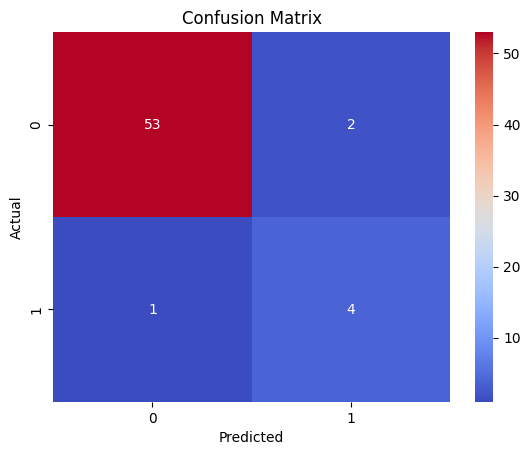


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.67      0.80      0.73         5

    accuracy                           0.95        60
   macro avg       0.82      0.88      0.85        60
weighted avg       0.96      0.95      0.95        60



In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [30]:
# Save model and scaler
joblib.dump(model, "../models/engagement_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("✅ Model and Scaler saved successfully in 'models/' folder.")


✅ Model and Scaler saved successfully in 'models/' folder.


### ✅ Summary

- Logistic Regression performed well for engagement prediction.  
- Model, scaler, and dataset are ready for deployment.  
- Next step: integrate model into a simple app (using `app.py`).

Next notebook: **03-evaluation.ipynb** → deeper model analysis & performance visualization.
